<a href="https://colab.research.google.com/github/ganeshkumarreddy1/ML_on_cloud/blob/main/Bankruptcy_Analysis_with_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns

**Load and Explore the Data**

In [ ]:
import pandas as pd

# Loading the dataset
file_path = '/content/Company_House_Info.csv'
data = pd.read_csv(file_path)

In [ ]:
# Display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6665 entries, 0 to 6664
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6665 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6665 non-null   float64
 2    ROA(A) before interest and % after tax                   6665 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6665 non-null   float64
 4    Operating Gross Margin                                   6665 non-null   float64
 5    Realized Sales Gross Margin                              6665 non-null   float64
 6    Operating Profit Rate                                    6665 non-null   float64
 7    Pre-tax net Interest Rate                                6665 non-null   float64
 8    After-tax net Int

In [ ]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,...,6665.000000,6.665000e+03,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.000000,6665.0,6665.000000
mean,0.032858,0.505001,0.558380,0.553428,0.607878,0.607865,0.998749,0.797182,0.809075,0.303622,...,0.807594,1.905986e+07,0.623919,0.607877,0.840382,0.280392,0.027558,0.565323,1.0,0.047618
std,0.178279,0.060784,0.065801,0.061707,0.017031,0.017016,0.013159,0.013017,0.013757,0.011291,...,0.040501,3.807642e+08,0.012425,0.017031,0.014682,0.014620,0.015847,0.013195,0.0,0.050340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476381,0.535379,0.527170,0.600383,0.600376,0.998969,0.797386,0.809311,0.303466,...,0.796667,9.076390e-04,0.623635,0.600384,0.840104,0.276945,0.026791,0.565158,1.0,0.024399
50%,0.000000,0.502511,0.559693,0.552171,0.605918,0.605897,0.999022,0.797462,0.809375,0.303525,...,0.810496,2.113890e-03,0.623879,0.605917,0.841168,0.278786,0.026808,0.565252,1.0,0.033731
75%,0.000000,0.535270,0.588803,0.583971,0.613738,0.613694,0.999094,0.797578,0.809468,0.303584,...,0.826247,5.351722e-03,0.624171,0.613739,0.842349,0.281489,0.026915,0.565734,1.0,0.052776
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [ ]:
# checking for missing values
print(data.isnull().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


In [ ]:
data.head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


**Exploratory Data Analysis (EDA)**

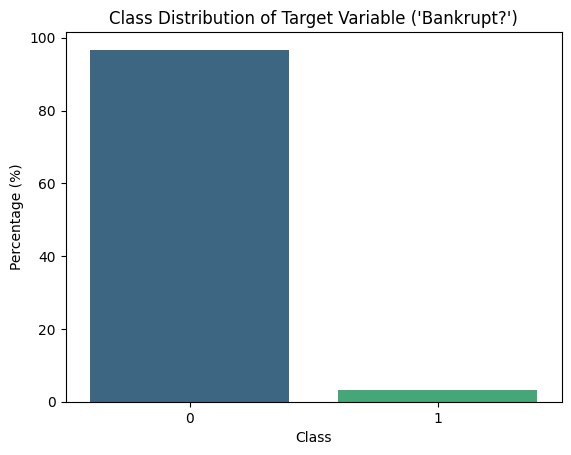

In [ ]:
# Check Class Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the class distribution
class_distribution = data['Bankrupt?'].value_counts(normalize=True) * 100
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette="viridis")
plt.title("Class Distribution of Target Variable ('Bankrupt?')")
plt.xlabel("Class")
plt.ylabel("Percentage (%)")
plt.show()

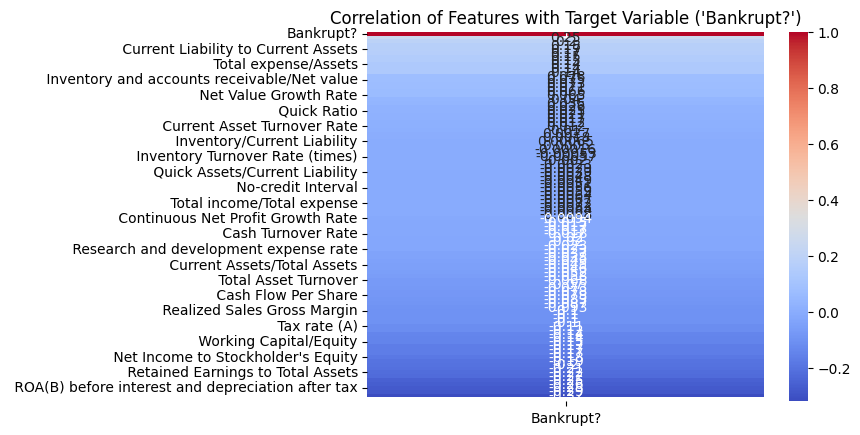

In [ ]:
# Compute and plot correlations
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix[['Bankrupt?']].sort_values(by='Bankrupt?', ascending=False),
            annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Target Variable ('Bankrupt?')")
plt.show()

**Data Preprocessing**

In [ ]:
# Function to remove outliers using the IQR method
def remove_outliers_iqr(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

In [ ]:
# Removal of leading and trailing spaces from column names
data.columns = data.columns.str.strip()

In [ ]:
# Printing the column names to verify
print(data.columns.tolist())

['Bankrupt?', 'ROA(C) before interest and depreciation before interest', 'ROA(A) before interest and % after tax', 'ROA(B) before interest and depreciation after tax', 'Operating Gross Margin', 'Realized Sales Gross Margin', 'Operating Profit Rate', 'Pre-tax net Interest Rate', 'After-tax net Interest Rate', 'Non-industry income and expenditure/revenue', 'Continuous interest rate (after tax)', 'Operating Expense Rate', 'Research and development expense rate', 'Cash flow rate', 'Interest-bearing debt interest rate', 'Tax rate (A)', 'Net Value Per Share (B)', 'Net Value Per Share (A)', 'Net Value Per Share (C)', 'Persistent EPS in the Last Four Seasons', 'Cash Flow Per Share', 'Revenue Per Share (Yuan ¥)', 'Operating Profit Per Share (Yuan ¥)', 'Per Share Net profit before tax (Yuan ¥)', 'Realized Sales Gross Profit Growth Rate', 'Operating Profit Growth Rate', 'After-tax Net Profit Growth Rate', 'Regular Net Profit Growth Rate', 'Continuous Net Profit Growth Rate', 'Total Asset Growth R

In [ ]:
# Application of outlier removal on selected features
top_features = ['Net Income to Total Assets', 'ROA(A) before interest and % after tax']
data_cleaned = data.copy()
for feature in top_features:
    data_cleaned = remove_outliers_iqr(data_cleaned, feature)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalization of the selected features
scaler = MinMaxScaler()
data_normalized = data_cleaned.copy()
data_normalized[top_features] = scaler.fit_transform(data_cleaned[top_features])

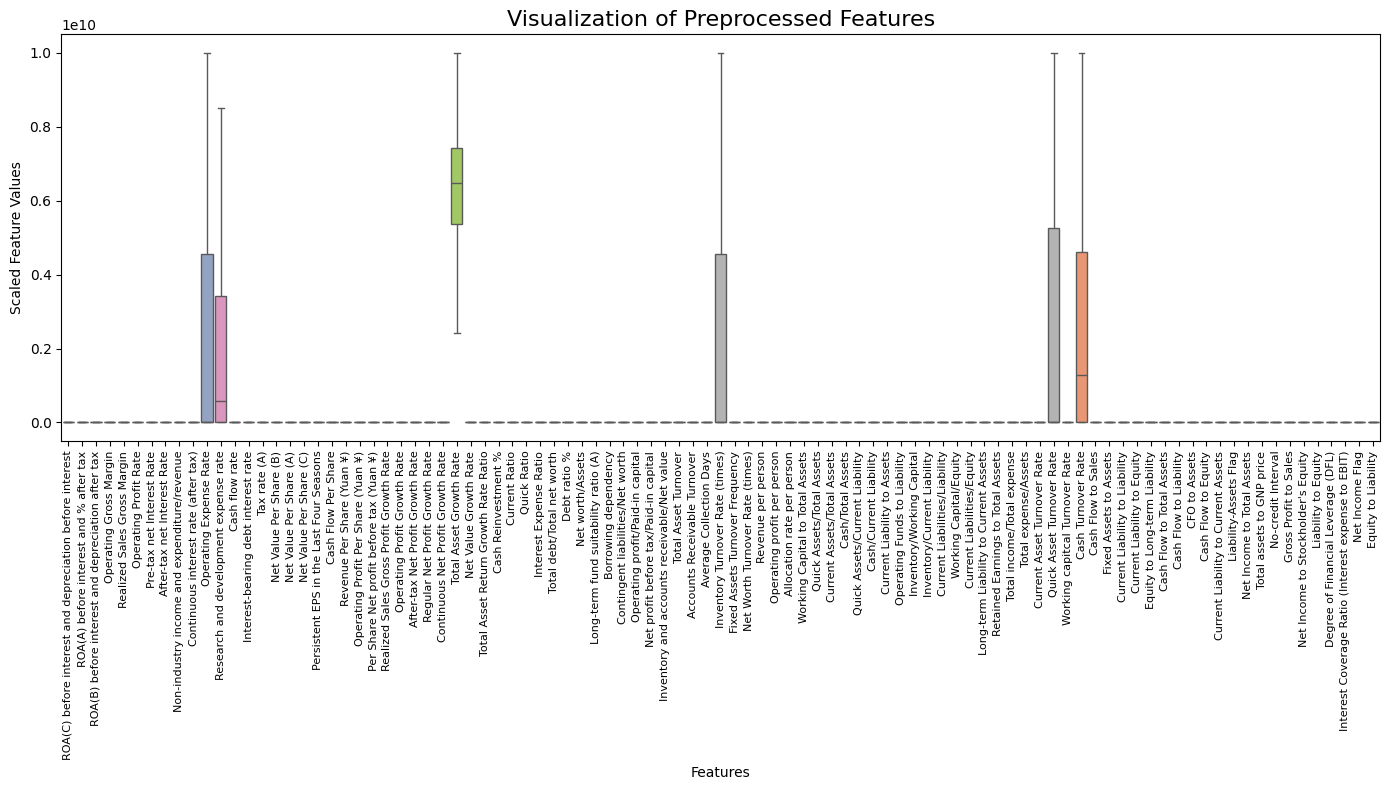

In [ ]:
# Visualization of Preprocessed Data
# Function to visualize feature distributions after preprocessing
def visualize_preprocessed_data(data, title="Preprocessed Data Visualization"):
    """
    Visualizes the distributions of features to confirm preprocessing.

    Parameters:
        data (DataFrame): The dataset to visualize.
        title (str): The title for the visualization.
    """
    # Plotting a boxplot of all features
    plt.figure(figsize=(14, 8))
    sns.boxplot(data=data, palette="Set2", showfliers=False)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(title, fontsize=16)
    plt.ylabel("Scaled Feature Values")
    plt.xlabel("Features")
    plt.tight_layout()
    plt.show()

# Visualization of the preprocessed data excluding the target variable
visualize_preprocessed_data(
    data_normalized.drop(columns=['Bankrupt?']),
    title="Visualization of Preprocessed Features"
)


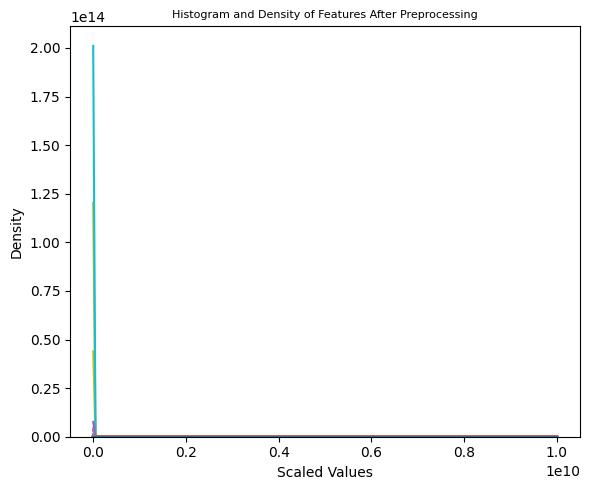

In [ ]:
# Histogram and Density Visualization
# Function to visualize histograms and density plots of features
def visualize_distributions(data, title="Feature Distributions After Preprocessing"):
    """
    Visualizes the distributions of features using histograms and density plots.

    Parameters:
        data (DataFrame): The dataset to visualize.
        title (str): The title for the visualization.
    """
    # Plotting histograms for all features
    data_melted = data.melt(var_name="Features", value_name="Values")
    plt.figure(figsize=(6, 5))
    sns.histplot(data=data_melted, x="Values", hue="Features", element="step", kde=True, palette="tab10", bins=50)
    plt.title(title, fontsize=8)
    plt.xlabel("Scaled Values")
    plt.ylabel("Density")
    plt.legend([], [], frameon=False)
    plt.tight_layout()
    plt.show()

# Visualization of feature distributions after preprocessing
visualize_distributions(
    data_normalized.drop(columns=['Bankrupt?']),
    title="Histogram and Density of Features After Preprocessing"
)

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

# Defining the features and target variable
X = data_normalized.drop(columns=['Bankrupt?'])
y = data_normalized['Bankrupt?']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Model Training with Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
  # Logistic Regression
log_reg_params = {'C': [0.01, 0.1, 1, 10]}
log_reg = GridSearchCV(LogisticRegression(max_iter=1000), log_reg_params, cv=5, scoring='f1')
log_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10]}, scoring='f1')

In [ ]:
# Random Forest
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1')
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='f1')

In [ ]:
# Gradient Boosting
gb_params = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 5]}
gb = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_params, cv=5, scoring='f1')
gb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='f1')

**Model Evaluation and Visualization**

In [ ]:
# ROC Curve

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# Predictions
y_pred_log = log_reg.best_estimator_.predict(X_test)
y_pred_rf = rf.best_estimator_.predict(X_test)
y_pred_gb = gb.best_estimator_.predict(X_test)

# Confusion Matrices
log_reg_conf_matrix = confusion_matrix(y_test, y_pred_log)
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
gb_conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Classification Reports
log_reg_class_report = classification_report(y_test, y_pred_log)
rf_class_report = classification_report(y_test, y_pred_rf)
gb_class_report = classification_report(y_test, y_pred_gb)

# ROC Curves and AUC
fpr_log, tpr_log, _ = roc_curve(y_test, log_reg.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_gb, tpr_gb, _ = roc_curve(y_test, gb.best_estimator_.predict_proba(X_test)[:, 1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

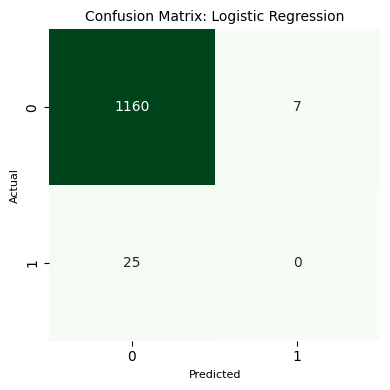

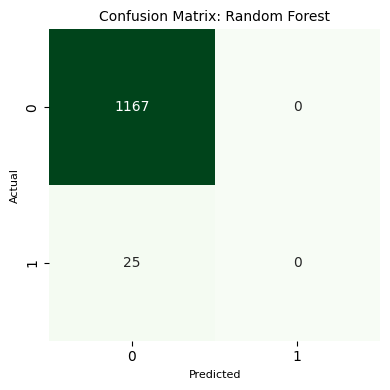

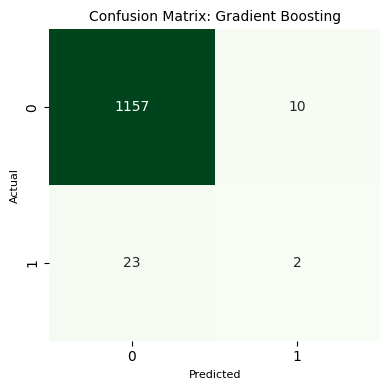

In [ ]:
# Confusion Matrices
def plot_conf_matrix(conf_matrix, title):
    plt.figure(figsize=(4, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", cbar=False)
    plt.title(title, fontsize=10)
    plt.ylabel("Actual", fontsize=8)
    plt.xlabel("Predicted", fontsize=8)
    plt.tight_layout()
    plt.show()

# Plot Logistic Regression Confusion Matrix
plot_conf_matrix(log_reg_conf_matrix, "Confusion Matrix: Logistic Regression")

# Plot Random Forest Confusion Matrix
plot_conf_matrix(rf_conf_matrix, "Confusion Matrix: Random Forest")

# Plot Gradient Boosting Confusion Matrix
plot_conf_matrix(gb_conf_matrix, "Confusion Matrix: Gradient Boosting")

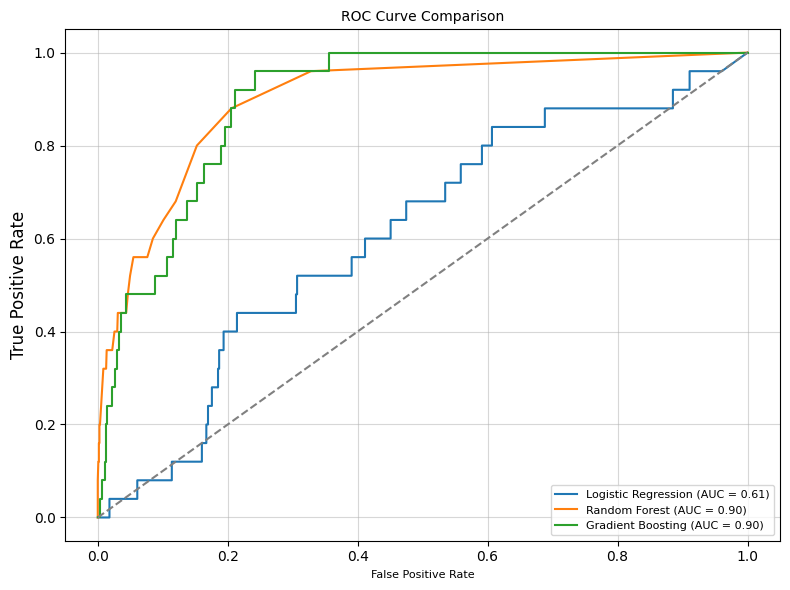

In [ ]:
# ROC Curve Comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC = {roc_auc_gb:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve Comparison", fontsize=10)
plt.xlabel("False Positive Rate", fontsize=8)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right", fontsize=8)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Print Classification Reports
print("Classification Report: Logistic Regression\n")
print(log_reg_class_report)
print("\nClassification Report: Random Forest\n")
print(rf_class_report)
print("\nClassification Report: Gradient Boosting")
print(gb_class_report)

Classification Report: Logistic Regression

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1167
           1       0.00      0.00      0.00        25

    accuracy                           0.97      1192
   macro avg       0.49      0.50      0.49      1192
weighted avg       0.96      0.97      0.97      1192


Classification Report: Random Forest

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1167
           1       0.00      0.00      0.00        25

    accuracy                           0.98      1192
   macro avg       0.49      0.50      0.49      1192
weighted avg       0.96      0.98      0.97      1192


Classification Report: Gradient Boosting
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1167
           1       0.17      0.08      0.11        25

    accuracy                           0.97      1192
   